In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

!wget https://www.dropbox.com/s/raftdxdg3e5in0q/new-iot-apis.csv
data=pd.read_csv("new-iot-apis.csv", sep='______',names=["type", "label", "description"],engine='python')
# print(data.shape)
# print(data.dtypes)
data=data.drop(data.index[0],axis=0)
data['label'] = data['label'].astype(str)
data['type'] = data['type'].astype(str)
data['description'] = data['description'].astype(str)

--2021-07-07 20:52:08--  https://www.dropbox.com/s/raftdxdg3e5in0q/new-iot-apis.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/raftdxdg3e5in0q/new-iot-apis.csv [following]
--2021-07-07 20:52:08--  https://www.dropbox.com/s/raw/raftdxdg3e5in0q/new-iot-apis.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb5697e1ce8f0b7575784b815fa.dl.dropboxusercontent.com/cd/0/inline/BR2SiRYfLFEO_06Fn2xbuxyWIwkzxr7KdLJDkWyTHVFuhkTzWgPfBuxLFHOQkatO_nOneaWSHxK5zVjb4TsB-RBhs6FoHJ6_Q77ifaSzmrelSilNhgEoFILC9RBXSmv_zWexwvB-ye6rAyyWXz7ag5R0/file# [following]
--2021-07-07 20:52:09--  https://ucb5697e1ce8f0b7575784b815fa.dl.dropboxusercontent.com/cd/0/inline/BR2SiRYfLFEO_06Fn2xbuxyWIwkzxr7KdLJDkWyTHVFuhkTzWgPfBuxLFHOQkatO_nOneaWSHxK5zV

In [11]:
data_sensor=data[data['label'].str.contains("Sensor")]
data_actuator=data[data['label']=="Actuator"]
data_none=data[data['label']=="None"]

print("Nº of sensor instances: ", str(data_sensor.shape[0]))
print("Nº of actuator instances: ", str(data_actuator.shape[0]))
print("Nº of none instances: ", str(data_none.shape[0]))
print("----")


Nº of sensor instances:  17
Nº of actuator instances:  38
Nº of none instances:  55
----


In [12]:
#Figure of distribution
fig = go.Figure(
    go.Bar(
        x=data['label'].value_counts().index,
        y=data['label'].value_counts().values)
)
fig['layout'].update(title={"text" : 'Distribution of API','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="Category API",yaxis_title="Number of API")
fig.update_layout(width=1000,height=1000)
fig

In [13]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_sensor['description'], data_sensor['label'], test_size=0.4,random_state=12) # good results with 12
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_actuator['description'], data_actuator['label'], test_size=0.4,random_state=12)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data_none['description'], data_none['label'], test_size=0.4,random_state=12)
X_train=pd.concat([X_train_1,X_train_2,X_train_3])
X_test=pd.concat([X_test_1,X_test_2,X_test_3])
y_train=pd.concat([y_train_1,y_train_2,y_train_3])
y_test=pd.concat([y_test_1,y_test_2,y_test_3])

print("train data instances:", X_train.shape[0])
print("\t-train sensors instances -> "+str(X_train_1.shape[0]))
print("\t-train actuators instances -> "+str(X_train_2.shape[0]))
print("\t-train none instances -> "+str(X_train_3.shape[0]))
print("test data instances:", X_test.shape[0])
print("\t-test sensors instances -> "+str(X_test_1.shape[0]))
print("\t-test actuators instances -> "+str(X_test_2.shape[0]))
print("\t-test none instances -> "+str(X_test_3.shape[0]))


train data instances: 65
	-train sensors instances -> 10
	-train actuators instances -> 22
	-train none instances -> 33
test data instances: 45
	-test sensors instances -> 7
	-test actuators instances -> 16
	-test none instances -> 22


In [14]:
def plot_bat(report):
  plt.bar(name, report['accuracy'] )
  plt.ylim(0.0,1.0)
  plt.ylabel('Accuracy')

  # plt.bar(name, report ['Actuator']['precision'] )
  # plt.ylim(0.0,1.0)
  # plt.ylabel('Actuator-precision')

  # plt.bar(name, report ['Sensor']['precision'] )
  # plt.ylim(0.0,1.0)
  # plt.ylabel('Sensor-precision')

  # plt.bar(name, report ['None']['precision'] )
  # plt.ylim(0.0,1.0)
  # plt.ylabel('None-precision')

  # plt.bar(name, report ['Actuator']['recall'] )
  # plt.ylim(0.0,1.0)
  # plt.ylabel('Actuator-recall')

  # plt.bar(name, report ['Sensor']['recall'] )
  # plt.ylim(0.0,1.0)
  # plt.ylabel('Sensor-recall')

  # plt.bar(name, report ['None']['recall'] )
  # plt.ylim(0.0,1.0)
  # plt.ylabel('None-recall')


MNB
              precision    recall  f1-score   support

    Actuator       0.00      0.00      0.00        16
        None       0.49      1.00      0.66        22
      Sensor       0.00      0.00      0.00         7

    accuracy                           0.49        45
   macro avg       0.16      0.33      0.22        45
weighted avg       0.24      0.49      0.32        45

************************************
DTree
              precision    recall  f1-score   support

    Actuator       0.50      0.50      0.50        16
        None       0.67      0.73      0.70        22
      Sensor       0.20      0.14      0.17         7

    accuracy                           0.56        45
   macro avg       0.46      0.46      0.45        45
weighted avg       0.53      0.56      0.54        45

************************************
RF
              precision    recall  f1-score   support

    Actuator       0.64      0.44      0.52        16
        None       0.65      1.00      0.7

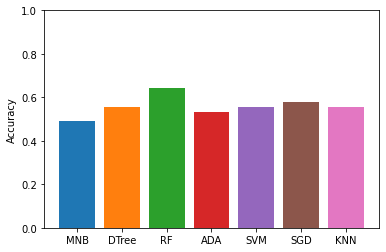

In [15]:
algorithms = { 'MNB' : MultinomialNB(),
         'DTree': DecisionTreeClassifier(),
         'RF' : RandomForestClassifier(),
         'ADA' : AdaBoostClassifier(), 
         'SVM' : svm.SVC(decision_function_shape='ovo'), 
         'SGD': SGDClassifier(), 
         'KNN': KNeighborsClassifier()
        } # add here classifiers
fscores = []
score = []
for name, algorithm in algorithms.items():
  pipeline = Pipeline([
                      ('bow',CountVectorizer()),
                      ('tfidf',TfidfTransformer()),
                      ('classifier',algorithm)
  ])
  pipeline.fit(X_train,y_train)
  predictions = pipeline.predict(X_test)
  report = classification_report(y_test, predictions, output_dict=True, zero_division='warn')
  fscores.append([name, report['Sensor']['f1-score'], report['Actuator']['f1-score'], report['None']['f1-score']])
  score.append([name, (report['Sensor']['precision'],report['Sensor']['recall']), (report['Actuator']['precision'],report['Actuator']['recall']), (report['None']['precision'],report['None']['precision'])])
  print(name)
  print(classification_report(y_test, predictions))
  print("************************************")
  plot_bat(report)


Text(0, 0.5, 'Recall')

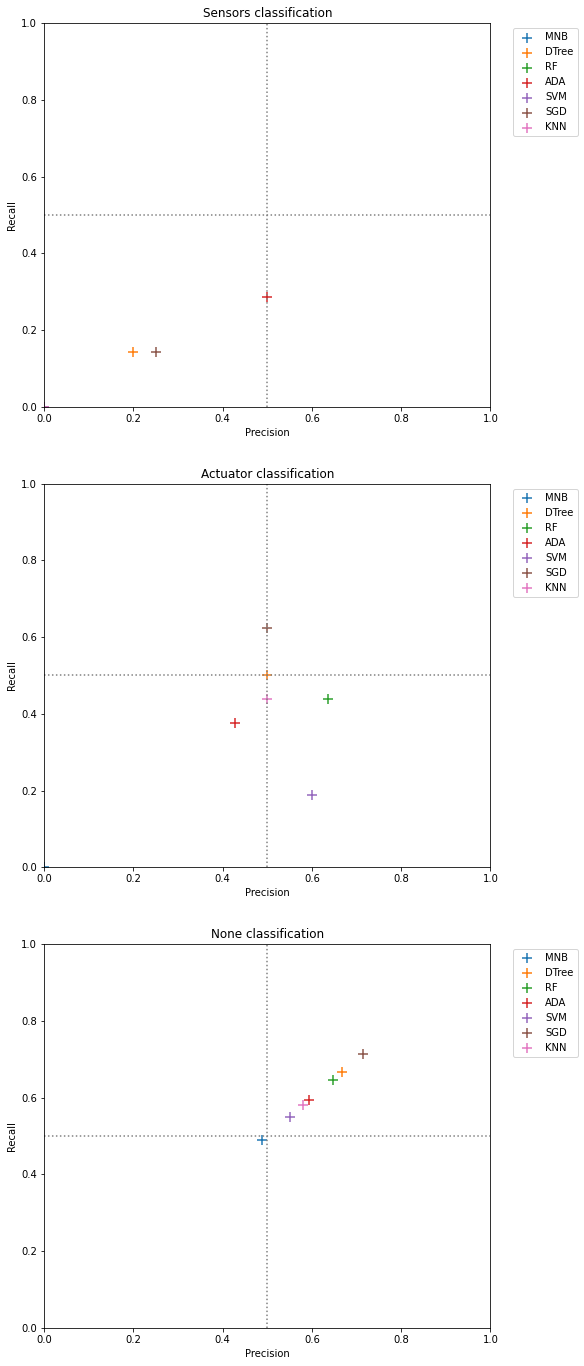

In [16]:
plt.figure(figsize=(8, 24)) # 4, 12 regular size

sensor_lines = []
actuator_lines = []
none_lines = []
for name, sensors_tuple, actuator_tuple, none_tuple in score:
  plt.subplot(3, 1, 1)
  point_sensor = plt.scatter(sensors_tuple[0], sensors_tuple[1], s=120, marker='+')
  sensor_lines.append(point_sensor)
  plt.subplot(3, 1, 2)
  actuator_point = plt.scatter(actuator_tuple[0], actuator_tuple[1], s=120, marker='+')
  actuator_lines.append(actuator_point)
  plt.subplot(3, 1, 3)
  none_point = plt.scatter(none_tuple[0], none_tuple[1], s=120, marker='+')
  none_lines.append(none_point)


plt.subplot(3, 1, 1)
plt.title("Sensors classification")
plt.legend(sensor_lines, algorithms.keys(), bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(y=0.5, color='gray', linestyle='dotted')
plt.vlines((0.5,), ymin=0, ymax=1, color='gray', linestyle='dotted')
plt.xlabel('Precision')
plt.ylabel('Recall')  
plt.subplot(3, 1, 2)
plt.title("Actuator classification")
plt.legend(actuator_lines, algorithms.keys(), bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(y=0.5, color='gray', linestyle='dotted')
plt.vlines((0.5,), ymin=0, ymax=1, color='gray', linestyle='dotted')
plt.xlabel('Precision')
plt.ylabel('Recall')  
plt.subplot(3, 1, 3)
plt.title("None classification")
plt.legend(none_lines, algorithms.keys(), bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylim(0,1)
plt.xlim(0,1)
plt.axhline(y=0.5, color='gray', linestyle='dotted')
plt.vlines((0.5,), ymin=0, ymax=1, color='gray', linestyle='dotted')
plt.xlabel('Precision')
plt.ylabel('Recall')  